In [ ]:
!pip install keras-tcn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 10.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tcn import TCN, tcn_full_summary
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from numpy.random import seed
seed(1052023)
from random import randrange
scaler = MinMaxScaler()

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
df = pd.read_excel("NASDAQ Realized Volatility.xlsx",index_col='Date',parse_dates=True)
df_for_date=df[int(len(df['Realised'])*0.7):].reset_index()



In [ ]:
n_inputs = [21,63,84,126,189,252]
n_neurons = [14,42,56,84,126,168]
dilations = [[1,2,1],[1,2,2,1],[1,2,4,1],[1,2,2,2,1],[1,2,4,2,1],[1,2,4,4,1]]
kernel_size=[2,3,4,6]
epochs=[1,3,5,7,10,15]
dropouts=[0,0.2,0.4]
losses=['mse','mae','huber_loss']
RMSE = []
Accuracy = []

# Hyperparameter Search

In [ ]:
for m in range (5):
    i=randrange(6)
    h=randrange(6)
    k=randrange(4)
    l=randrange(3)
    m=randrange(6)
    n=randrange(3)
    o=randrange(2)
    seed(1052023)
    train = df.iloc[:int(len(df['Realised'])*0.6)]
    validation = df.iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
    test = df.iloc[int(len(df['Realised'])*0.7):]
    scaler.fit(train)
    scaled_train_input = scaler.transform(train)
    scaled_validation_input = scaler.transform(validation)
    scaled_test_input = scaler.transform(test)
    train = df["Realised"].iloc[:int(len(df['Realised'])*0.6)]
    validation = df["Realised"].iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
    test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
    train = train.array.reshape(-1, 1)
    validation = validation.array.reshape(-1, 1)
    test = test.array.reshape(-1, 1)
    scaler.fit(train)
    scaled_train_target = scaler.transform(train)
    scaled_validation_target = scaler.transform(validation)
    scaled_test_target = scaler.transform(test)
    n_features = 2
    n_input = n_inputs[i]
    generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
    model = Sequential()
    model.add(TCN(kernel_size=kernel_size[k], dilations=dilations[i], nb_stacks=1,padding='causal',
                      dropout_rate=dropouts[l],activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss=losses[n], metrics=["accuracy", "mean_absolute_error"])
    model.fit(generator,epochs=epochs[m])
    last_train_batch = scaled_train_input[-n_input:]
    last_train_batch = last_train_batch.reshape((1, n_input, n_features))
    a = np.array(scaled_validation_input)
    test_predictions = []
    first_eval_batch = scaled_train_input[-n_input:]
    current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
    for j in range(len(scaled_validation_input)):
            # get the prediction value for the first batch
        current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
        test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
        current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
    true_predictions = scaler.inverse_transform(test_predictions)
    RMSE=(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
    Accuracy=((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)
    print(f"Epoch: {epochs[m]} | Inputs: {n_inputs[i]} | Kernel: {kernel_size[k]} | Dropout: {dropouts[l]} | Loss: {losses[n]}")
    print(f"RMSE: {RMSE} | Accuracy: {Accuracy}")

Epoch 1/7
104/104 [==============================] - 18s 15ms/step - loss: 0.4018 - accuracy: 3.0130e-04 - mean_absolute_error: 0.4018
Epoch 2/7
104/104 [==============================] - 1s 9ms/step - loss: 0.0630 - accuracy: 3.0130e-04 - mean_absolute_error: 0.0630
Epoch 3/7
104/104 [==============================] - 1s 9ms/step - loss: 0.0411 - accuracy: 3.0130e-04 - mean_absolute_error: 0.0411
Epoch 4/7
104/104 [==============================] - 1s 9ms/step - loss: 0.0351 - accuracy: 3.0130e-04 - mean_absolute_error: 0.0351
Epoch 5/7
104/104 [==============================] - 1s 9ms/step - loss: 0.0328 - accuracy: 3.0130e-04 - mean_absolute_error: 0.0328
Epoch 6/7
104/104 [==============================] - 1s 9ms/step - loss: 0.0318 - accuracy: 3.0130e-04 - mean_absolute_error: 0.0318
Epoch 7/7
1/1 [==============================] - 0s 18ms/step
Epoch: 7 | Inputs: 189 | Kernel: 4 | Dropout: 0.4 | Loss: mae
RMSE: 0.0030777087951532564 | Accuracy: 61.765007867200474
Epoch 1/3
102/102

In [ ]:
for m in range (5):
    i=randrange(6)
    h=randrange(6)
    k=randrange(4)
    l=randrange(3)
    m=randrange(6)
    n=randrange(3)
    o=randrange(2)
    seed(1052023)
    train = df.iloc[:int(len(df['Realised'])*0.6)]
    validation = df.iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
    test = df.iloc[int(len(df['Realised'])*0.7):]
    scaler.fit(train)
    scaled_train_input = scaler.transform(train)
    scaled_validation_input = scaler.transform(validation)
    scaled_test_input = scaler.transform(test)
    train = df["Realised"].iloc[:int(len(df['Realised'])*0.6)]
    validation = df["Realised"].iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
    test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
    train = train.array.reshape(-1, 1)
    validation = validation.array.reshape(-1, 1)
    test = test.array.reshape(-1, 1)
    scaler.fit(train)
    scaled_train_target = scaler.transform(train)
    scaled_validation_target = scaler.transform(validation)
    scaled_test_target = scaler.transform(test)
    n_features = 2
    n_input = n_inputs[i]
    generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
    model = Sequential()
    model.add(TCN(kernel_size=kernel_size[k], dilations=dilations[i], nb_stacks=1,padding='causal',
                      dropout_rate=dropouts[l],activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss=losses[n], metrics=["accuracy", "mean_absolute_error"])
    model.fit(generator,epochs=epochs[m])
    last_train_batch = scaled_train_input[-n_input:]
    last_train_batch = last_train_batch.reshape((1, n_input, n_features))
    a = np.array(scaled_validation_input)
    test_predictions = []
    first_eval_batch = scaled_train_input[-n_input:]
    current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
    for j in range(len(scaled_validation_input)):
            # get the prediction value for the first batch
        current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
        test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
        current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
    true_predictions = scaler.inverse_transform(test_predictions)
    RMSE=(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
    Accuracy=((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)
    print(f"Epoch: {epochs[m]} | Inputs: {n_inputs[i]} | Kernel: {kernel_size[k]} | Dropout: {dropouts[l]} | Loss: {losses[n]}")
    print(f"RMSE: {RMSE} | Accuracy: {Accuracy}")

Epoch 1/7
104/104 [==============================] - 8s 14ms/step - loss: 2.4619 - accuracy: 3.0130e-04 - mean_absolute_error: 0.6765
Epoch 2/7
104/104 [==============================] - 1s 9ms/step - loss: 0.1758 - accuracy: 3.0130e-04 - mean_absolute_error: 0.2462
Epoch 3/7
104/104 [==============================] - 1s 10ms/step - loss: 0.0929 - accuracy: 3.0130e-04 - mean_absolute_error: 0.1737
Epoch 4/7
104/104 [==============================] - 1s 11ms/step - loss: 0.0627 - accuracy: 3.0130e-04 - mean_absolute_error: 0.1367
Epoch 5/7
104/104 [==============================] - 1s 13ms/step - loss: 0.0437 - accuracy: 3.0130e-04 - mean_absolute_error: 0.1194
Epoch 6/7
104/104 [==============================] - 1s 13ms/step - loss: 0.0317 - accuracy: 3.0130e-04 - mean_absolute_error: 0.1010
Epoch 7/7
1/1 [==============================] - 0s 28ms/step
Epoch: 7 | Inputs: 189 | Kernel: 3 | Dropout: 0.4 | Loss: mse
RMSE: 0.0037181610238590334 | Accuracy: 59.681286128825825
Epoch 1/5
106/

In [ ]:
for m in range (5):
    i=randrange(6)
    h=randrange(6)
    k=randrange(4)
    l=randrange(3)
    m=randrange(6)
    n=randrange(3)
    o=randrange(2)
    seed(1052023)
    train = df.iloc[:int(len(df['Realised'])*0.6)]
    validation = df.iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
    test = df.iloc[int(len(df['Realised'])*0.7):]
    scaler.fit(train)
    scaled_train_input = scaler.transform(train)
    scaled_validation_input = scaler.transform(validation)
    scaled_test_input = scaler.transform(test)
    train = df["Realised"].iloc[:int(len(df['Realised'])*0.6)]
    validation = df["Realised"].iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
    test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
    train = train.array.reshape(-1, 1)
    validation = validation.array.reshape(-1, 1)
    test = test.array.reshape(-1, 1)
    scaler.fit(train)
    scaled_train_target = scaler.transform(train)
    scaled_validation_target = scaler.transform(validation)
    scaled_test_target = scaler.transform(test)
    n_features = 2
    n_input = n_inputs[i]
    generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
    model = Sequential()
    model.add(TCN(kernel_size=kernel_size[k], dilations=dilations[i], nb_stacks=1,padding='causal',
                      dropout_rate=dropouts[l],activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss=losses[n], metrics=["accuracy", "mean_absolute_error"])
    model.fit(generator,epochs=epochs[m])
    last_train_batch = scaled_train_input[-n_input:]
    last_train_batch = last_train_batch.reshape((1, n_input, n_features))
    a = np.array(scaled_validation_input)
    test_predictions = []
    first_eval_batch = scaled_train_input[-n_input:]
    current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
    for j in range(len(scaled_validation_input)):
            # get the prediction value for the first batch
        current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
        test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
        current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
    true_predictions = scaler.inverse_transform(test_predictions)
    RMSE=(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
    Accuracy=((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)
    print(f"Epoch: {epochs[m]} | Inputs: {n_inputs[i]} | Kernel: {kernel_size[k]} | Dropout: {dropouts[l]} | Loss: {losses[n]}")
    print(f"RMSE: {RMSE} | Accuracy: {Accuracy}")

Epoch 1/5
106/106 [==============================] - 8s 12ms/step - loss: 0.3589 - accuracy: 2.9568e-04 - mean_absolute_error: 0.5752
Epoch 2/5
106/106 [==============================] - 1s 10ms/step - loss: 0.0256 - accuracy: 2.9568e-04 - mean_absolute_error: 0.1307
Epoch 3/5
106/106 [==============================] - 1s 10ms/step - loss: 0.0118 - accuracy: 2.9568e-04 - mean_absolute_error: 0.0892
Epoch 4/5
106/106 [==============================] - 1s 10ms/step - loss: 0.0067 - accuracy: 2.9568e-04 - mean_absolute_error: 0.0686
Epoch 5/5
1/1 [==============================] - 0s 30ms/step
Epoch: 5 | Inputs: 126 | Kernel: 3 | Dropout: 0.4 | Loss: huber_loss
RMSE: 0.0036210925337389556 | Accuracy: 61.467513737651956
Epoch 1/10
104/104 [==============================] - 7s 11ms/step - loss: 0.6242 - accuracy: 3.0130e-04 - mean_absolute_error: 0.6242
Epoch 2/10
104/104 [==============================] - 1s 10ms/step - loss: 0.0811 - accuracy: 3.0130e-04 - mean_absolute_error: 0.0811
Epoc

In [ ]:
for m in range (5):
    i=randrange(6)
    h=randrange(6)
    k=randrange(4)
    l=randrange(3)
    m=randrange(6)
    n=randrange(3)
    o=randrange(2)
    seed(1052023)
    train = df.iloc[:int(len(df['Realised'])*0.6)]
    validation = df.iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
    test = df.iloc[int(len(df['Realised'])*0.7):]
    scaler.fit(train)
    scaled_train_input = scaler.transform(train)
    scaled_validation_input = scaler.transform(validation)
    scaled_test_input = scaler.transform(test)
    train = df["Realised"].iloc[:int(len(df['Realised'])*0.6)]
    validation = df["Realised"].iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
    test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
    train = train.array.reshape(-1, 1)
    validation = validation.array.reshape(-1, 1)
    test = test.array.reshape(-1, 1)
    scaler.fit(train)
    scaled_train_target = scaler.transform(train)
    scaled_validation_target = scaler.transform(validation)
    scaled_test_target = scaler.transform(test)
    n_features = 2
    n_input = n_inputs[i]
    generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
    model = Sequential()
    model.add(TCN(kernel_size=kernel_size[k], dilations=dilations[i], nb_stacks=1,padding='causal',
                      dropout_rate=dropouts[l],activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss=losses[n], metrics=["accuracy", "mean_absolute_error"])
    model.fit(generator,epochs=epochs[m])
    last_train_batch = scaled_train_input[-n_input:]
    last_train_batch = last_train_batch.reshape((1, n_input, n_features))
    a = np.array(scaled_validation_input)
    test_predictions = []
    first_eval_batch = scaled_train_input[-n_input:]
    current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
    for j in range(len(scaled_validation_input)):
            # get the prediction value for the first batch
        current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
        test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
        current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
    true_predictions = scaler.inverse_transform(test_predictions)
    RMSE=(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
    Accuracy=((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)
    print(f"Epoch: {epochs[m]} | Inputs: {n_inputs[i]} | Kernel: {kernel_size[k]} | Dropout: {dropouts[l]} | Loss: {losses[n]}")
    print(f"RMSE: {RMSE} | Accuracy: {Accuracy}")

Epoch 1/5
109/109 [==============================] - 4s 8ms/step - loss: 0.0109 - accuracy: 2.8678e-04 - mean_absolute_error: 0.0927
Epoch 2/5
109/109 [==============================] - 1s 6ms/step - loss: 0.0025 - accuracy: 2.8678e-04 - mean_absolute_error: 0.0494
Epoch 3/5
109/109 [==============================] - 1s 6ms/step - loss: 0.0013 - accuracy: 2.8678e-04 - mean_absolute_error: 0.0333
Epoch 4/5
109/109 [==============================] - 1s 6ms/step - loss: 9.4598e-04 - accuracy: 2.8678e-04 - mean_absolute_error: 0.0287
Epoch 5/5
1/1 [==============================] - 0s 24ms/step
Epoch: 5 | Inputs: 21 | Kernel: 3 | Dropout: 0 | Loss: huber_loss
RMSE: 0.004099881193331376 | Accuracy: 36.17853033785104
Epoch 1/15
104/104 [==============================] - 9s 15ms/step - loss: 0.6219 - accuracy: 3.0130e-04 - mean_absolute_error: 0.3768
Epoch 2/15
104/104 [==============================] - 1s 10ms/step - loss: 0.0597 - accuracy: 3.0130e-04 - mean_absolute_error: 0.1494
Epoch 3/1

Epoch: 3 | Inputs: 189 | Kernel: 3 | Dropout: 0.2 | Loss: mae
RMSE: 0.003041260151870186 | Accuracy: 64.341319107766

# H=1 Forecasts

In [ ]:
Accuracy=[]
RMSE=[]
Quasilikelihood=[]

In [ ]:
for m in range (10):
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7):]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  n_features = 2
  n_input = 189
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(TCN(kernel_size=3, dilations=[1,2,4,2,1], nb_stacks=1,padding='causal',
                dropout_rate=0.2,activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss='mae', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=3)
  last_train_batch = scaled_train_input[-n_input:]
  last_train_batch = last_train_batch.reshape((1, n_input, n_features))
  a = np.array(scaled_test_input)
  test_predictions = []
  first_eval_batch = scaled_train_input[-n_input:]
  current_batch = first_eval_batch.reshape((1, n_input, n_features))
      
  for j in range(len(test)):
              # get the prediction value for the first batch
      current_pred = model.predict(current_batch)[0]
              # append the prediction into the array
      test_predictions.append(current_pred) 
              # use the prediction to update the batch and remove the first value
      current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
  true_predictions = scaler.inverse_transform(test_predictions)
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
  Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Streaminguitvoer ingekort tot de laatste 5000 regels.
1/1 [==============================] - 0s 57ms/step
Epoch 1/3
122/122 [==============================] - 7s 12ms/step - loss: 0.2115 - accuracy: 2.5621e-04 - mean_absolute_error: 0.2115
Epoch 2/3
122/122 [==============================] - 2s 12ms/step - loss: 0.0451 - accuracy: 2.5621e-04 - mean_absolute_error: 0.0451
Epoch 3/3
1/1 [==============================] - 0s 31ms/step
Epoch 1/3
122/122 [==============================] - 9s 13ms/step - loss: 0.2111 - accuracy: 2.5621e-04 - mean_absolute_error: 0.2111
Epoch 2/3
122/122 [==============================] - 2s 12ms/step - loss: 0.0466 - accuracy: 2.5621e-04 - mean_absolute_error: 0.0466
Epoch 3/3
1/1 [==============================] - 0s 33ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Streaminguitvoer ingekort tot de laatste 5000 regels.
1/1 [==============================] - 0s 21ms/step
Epoch 1/3
122/122 [==============================] - 7s 12ms/step - loss: 0.2340 - accuracy: 2.5621e-04 - mean_absolute_error: 0.2340
Epoch 2/3
122/122 [==============================] - 1s 11ms/step - loss: 0.0525 - accuracy: 2.5621e-04 - mean_absolute_error: 0.0525
Epoch 3/3
1/1 [==============================] - 0s 46ms/step
Epoch 1/3
122/122 [==============================] - 7s 13ms/step - loss: 0.3355 - accuracy: 2.5621e-04 - mean_absolute_error: 0.3355
Epoch 2/3
122/122 [==============================] - 1s 12ms/step - loss: 0.0607 - accuracy: 2.5621e-04 - mean_absolute_error: 0.0607
Epoch 3/3
1/1 [==============================] - 0s 60ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
122/122 [==============================] - 8s 11ms/step - loss: 0.2225 - accuracy: 2.5621e-04 - mean_absolute_error: 0.2225
Epoch 2/3
122/122 [==============================] - 1s 10ms/step - loss: 0.0492 - accuracy: 2.5621e-04 - mean_absolute_error: 0.0492
Epoch 3/3
1/1 [==============================] - 0s 18ms/step
Epoch 1/3
122/122 [==============================] - 8s 12ms/step - loss: 0.2653 - accuracy: 2.5621e-04 - mean_absolute_error: 0.2653
Epoch 2/3
122/122 [==============================] - 1s 12ms/step - loss: 0.0507 - accuracy: 2.5621e-04 - mean_absolute_error: 0.0507
Epoch 3/3
1/1 [==============================] - 0s 29ms/step


In [ ]:
Accuracy

[66.27422258375677,
 63.65883296873771,
 65.19956490629396,
 62.88407767968924,
 63.97777256786853,
 62.87599161110943,
 61.37817189915498,
 57.80211945831205,
 65.50821349970053,
 65.43469475036218,
 61.30227241894421,
 63.31496277012252,
 61.67506587818061,
 65.04784780590165,
 62.60760011118668]

In [ ]:
RMSE

[0.0037149357445849882,
 0.0036996789393734524,
 0.0036643589471582047,
 0.003481135163211244,
 0.003436837798038541,
 0.00355469759141334,
 0.0035805907353639267,
 0.0037766725670797096,
 0.0039555788120596526,
 0.0035298537704052035,
 0.003588885990950816,
 0.003672282619465878,
 0.0037749306331504987,
 0.003912486141112808,
 0.003623782396403483]

In [ ]:
Quasilikelihood

[0.09659587773285004,
 0.10268449777845358,
 0.09609971115404513,
 0.09713034341467126,
 0.0937236661099525,
 0.09913407619026983,
 0.10586767084270592,
 0.12022303639447918,
 0.1033936480058342,
 0.09055887518944225,
 0.10405324808397277,
 0.10044053630476829,
 0.10944838303362303,
 0.10554337632828123,
 0.10284516156762209]

Text(0, 0.5, 'NASDAQ Realized Volatility')

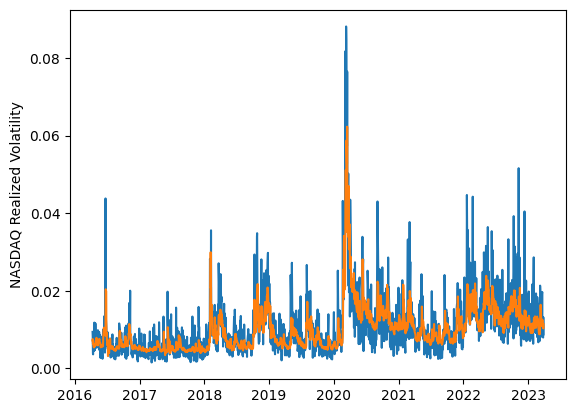

In [ ]:
# Best model
plt.plot(df_for_date["Date"], test)
plt.plot(df_for_date["Date"], true_predictions) 
plt.ylabel("NASDAQ Realized Volatility")

# H=3 Forecasts

In [ ]:
Accuracy=[]
RMSE=[]
Quasilikelihood=[]

In [ ]:
for m in range (2):
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7):]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  n_features = 2
  n_input = 189
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(TCN(kernel_size=3, dilations=[1,2,4,2,1], nb_stacks=1,padding='causal',
                dropout_rate=0.2,activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
  model.add(Dense(3))
  model.compile(optimizer='adam', loss='mae', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=3)
  last_train_batch = scaled_train_input[-n_input:]
  last_train_batch = last_train_batch.reshape((1, n_input, n_features))
  a = np.array(scaled_test_input)
  test_predictions = []
  first_eval_batch = scaled_train_input[-n_input:]
  current_batch = first_eval_batch.reshape((1, n_input, n_features))
      
  for j in range(int(len(test)/3)):
              # get the prediction value for the first batch
      current_pred = model.predict(current_batch)[0]
              # append the prediction into the array
      test_predictions.append(current_pred) 
              # use the prediction to update the batch and remove the first value
      current_batch = np.append(current_batch[:,3:,:],[a[j*3:(j+1)*3]],axis=1)
  true_predictions = scaler.inverse_transform(test_predictions)
  true_predictions=true_predictions.reshape(1755,1)
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
  Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/3
122/122 [==============================] - 16s 13ms/step - loss: 0.1656 - accuracy: 0.3305 - mean_absolute_error: 0.1656
Epoch 2/3
122/122 [==============================] - 1s 9ms/step - loss: 0.0336 - accuracy: 0.3377 - mean_absolute_error: 0.0336
Epoch 3/3
1/1 [==============================] - 0s 33ms/step
Epoch 1/3
122/122 [==============================] - 7s 10ms/step - loss: 0.1216 - accuracy: 0.3285 - mean_absolute_error: 0.1216
Epoch 2/3
122/122 [==============================] - 1s 9ms/step - loss: 0.0334 - accuracy: 0.2918 - mean_absolute_error: 0.0334
Epoch 3/3
1/1 [==============================] - 0s 28ms/step


In [ ]:
RMSE

[0.0037438309221147345,
 0.0037374224776788455,
 0.0038385696892127247,
 0.003806807572643774,
 0.003692329829583405,
 0.0037996442098570636,
 0.003762916744397274,
 0.0037909126170802975,
 0.0038048572714109146,
 0.0037289537004654067,
 0.0037651910315341652,
 0.003737339135246975,
 0.0037530870006611825,
 0.0038883777908866424,
 0.0038190444255662447]

In [ ]:
Accuracy

[62.119967846680915,
 59.64330925652659,
 61.780753446220714,
 60.78942702287789,
 61.75393352605103,
 55.777658828748166,
 59.18896848907755,
 58.41666366420344,
 60.17585593637138,
 62.89465486802146,
 57.052499497301966,
 59.4266675216445,
 60.70072378829342,
 53.41949163036072,
 65.53916782340946]

In [ ]:
Quasilikelihood

[0.1077108446899606,
 0.11264316418658649,
 0.1110848069565918,
 0.11397620742776636,
 0.10492266932267252,
 0.12676577542350445,
 0.1141285573609789,
 0.11916593242260877,
 0.11390049450988453,
 0.1024465269057953,
 0.12293836311216888,
 0.11370492515163484,
 0.1097868074525555,
 0.1336554808342862,
 0.0995866435657206]

Text(0, 0.5, 'NASDAQ Realized Volatility')

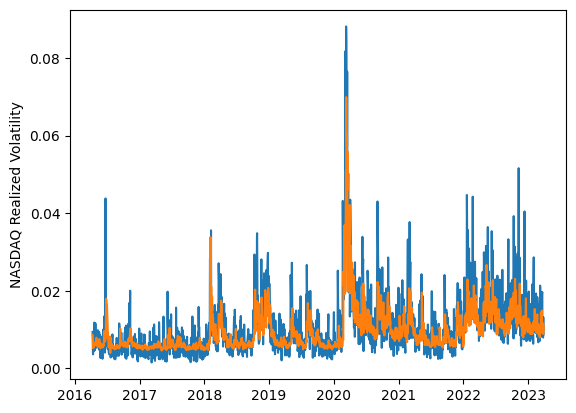

In [ ]:
# Best model
plt.plot(df_for_date["Date"][:len(test)], test)
plt.plot(df_for_date["Date"][:len(test)], true_predictions) 
plt.ylabel("NASDAQ Realized Volatility")

# H=5 Forecasts

In [ ]:
Accuracy=[]
RMSE=[]
Quasilikelihood=[]

In [ ]:
for m in range (13):
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7):]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  n_features = 2
  n_input = 189
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(TCN(kernel_size=3, dilations=[1,2,4,2,1], nb_stacks=1,padding='causal',
                dropout_rate=0.2,activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
  model.add(Dense(5))
  model.compile(optimizer='adam', loss='mae', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=3)
  last_train_batch = scaled_train_input[-n_input:]
  last_train_batch = last_train_batch.reshape((1, n_input, n_features))
  a = np.array(scaled_test_input)
  test_predictions = []
  first_eval_batch = scaled_train_input[-n_input:]
  current_batch = first_eval_batch.reshape((1, n_input, n_features))
      
  for j in range(int(len(test)/5)):
              # get the prediction value for the first batch
      current_pred = model.predict(current_batch)[0]
              # append the prediction into the array
      test_predictions.append(current_pred) 
              # use the prediction to update the batch and remove the first value
      current_batch = np.append(current_batch[:,5:,:],[a[j*5:(j+1)*5]],axis=1)
  true_predictions = scaler.inverse_transform(test_predictions)
  true_predictions=true_predictions.reshape(1755,1)
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
  Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/3
122/122 [==============================] - 9s 10ms/step - loss: 0.1485 - accuracy: 0.2365 - mean_absolute_error: 0.1485
Epoch 2/3
122/122 [==============================] - 1s 9ms/step - loss: 0.0348 - accuracy: 0.2583 - mean_absolute_error: 0.0348
Epoch 3/3
1/1 [==============================] - 0s 21ms/step
Epoch 1/3
122/122 [==============================] - 7s 11ms/step - loss: 0.1466 - accuracy: 0.2255 - mean_absolute_error: 0.1466
Epoch 2/3
122/122 [==============================] - 1s 9ms/step - loss: 0.0370 - accuracy: 0.2398 - mean_absolute_error: 0.0370
Epoch 3/3
1/1 [==============================] - 0s 19ms/step
Epoch 1/3
122/122 [==============================] - 7s 10ms/step - loss: 0.1571 - accuracy: 0.1965 - mean_absolute_error: 0.1571
Epoch 2/3
122/122 [==============================] - 1s 10ms/step - loss: 0.0350 - accuracy: 0.1973 - mean_absolute_error: 0.0350
Epoch 3/3
1/1 [==============================] - 0s 35ms/step
Epoch 1/3
122/122 [=================

In [ ]:
RMSE

[0.003953542854591501,
 0.0038794299441486982,
 0.003848202527491445,
 0.0040214885374010665,
 0.004144634207665992,
 0.00407703998197102,
 0.003911343539270819,
 0.003962412278277594,
 0.00399105651836824,
 0.003998311908536012,
 0.003740191460971993,
 0.0039235118024828035,
 0.003910411370053539,
 0.003939161772781135,
 0.0040053483429485755]

In [ ]:
Accuracy

[54.853095083741486,
 56.86279601502764,
 57.17483189973922,
 57.74345579356991,
 49.04967129686577,
 55.651835098109444,
 54.757329309700545,
 60.53113158688477,
 53.94352116222814,
 50.79822883627071,
 60.38556429166412,
 58.571814269655334,
 58.05944188357659,
 59.75365566830898,
 59.97733829680374]

In [ ]:
Quasilikelihood

[0.13147196923763405,
 0.12429468430711638,
 0.12387666087406009,
 0.12511003752109479,
 0.1526508237395935,
 0.13378279396563125,
 0.1326191276056329,
 0.1170197191876684,
 0.1336713217984714,
 0.14746383344301445,
 0.1131880170603804,
 0.12192880246811869,
 0.12235134667524047,
 0.11803073220276768,
 0.12001728800940271]

Text(0, 0.5, 'NASDAQ Realized Volatility')

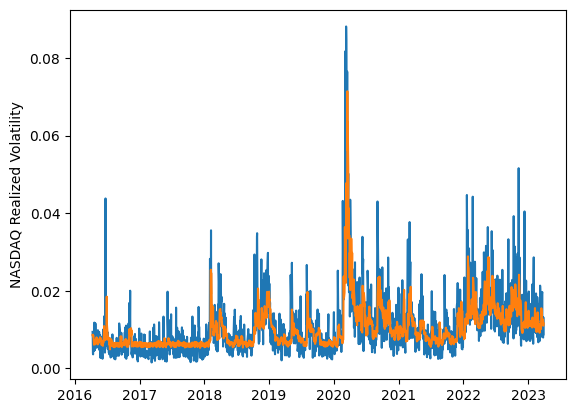

In [ ]:
# Best model
plt.plot(df_for_date["Date"][:len(test)], test)
plt.plot(df_for_date["Date"][:len(test)], true_predictions) 
plt.ylabel("NASDAQ Realized Volatility")

# H=10 forecasts

In [ ]:
Accuracy=[]
RMSE=[]
Quasilikelihood=[]

In [ ]:
for m in range (13):
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7):]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  n_features = 2
  n_input = 189
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(TCN(kernel_size=3, dilations=[1,2,4,2,1], nb_stacks=1,padding='causal',
                dropout_rate=0.2,activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
  model.add(Dense(10))
  model.compile(optimizer='adam', loss='mae', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=3)
  last_train_batch = scaled_train_input[-n_input:]
  last_train_batch = last_train_batch.reshape((1, n_input, n_features))
  a = np.array(scaled_test_input)
  test_predictions = []
  first_eval_batch = scaled_train_input[-n_input:]
  current_batch = first_eval_batch.reshape((1, n_input, n_features))
      
  for j in range(int(len(test)/10)):
              # get the prediction value for the first batch
      current_pred = model.predict(current_batch)[0]
              # append the prediction into the array
      test_predictions.append(current_pred) 
              # use the prediction to update the batch and remove the first value
      current_batch = np.append(current_batch[:,10:,:],[a[j*10:(j+1)*10]],axis=1)
  true_predictions = scaler.inverse_transform(test_predictions)
  true_predictions=true_predictions.reshape(1750,1)
  test=test[:1750]
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
  Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/3
122/122 [==============================] - 8s 9ms/step - loss: 0.1239 - accuracy: 0.1068 - mean_absolute_error: 0.1239
Epoch 2/3
122/122 [==============================] - 1s 9ms/step - loss: 0.0325 - accuracy: 0.0794 - mean_absolute_error: 0.0325
Epoch 3/3
1/1 [==============================] - 0s 19ms/step
Epoch 1/3
122/122 [==============================] - 6s 10ms/step - loss: 0.0977 - accuracy: 0.1030 - mean_absolute_error: 0.0977
Epoch 2/3
122/122 [==============================] - 1s 10ms/step - loss: 0.0318 - accuracy: 0.0963 - mean_absolute_error: 0.0318
Epoch 3/3
1/1 [==============================] - 0s 28ms/step
Epoch 1/3
122/122 [==============================] - 8s 10ms/step - loss: 0.1681 - accuracy: 0.0945 - mean_absolute_error: 0.1681
Epoch 2/3
122/122 [==============================] - 1s 9ms/step - loss: 0.0344 - accuracy: 0.0802 - mean_absolute_error: 0.0344
Epoch 3/3
1/1 [==============================] - 0s 19ms/step
Epoch 1/3
122/122 [==================

In [ ]:
RMSE

[0.004125729849130761,
 0.004175541122001772,
 0.004145633795418072,
 0.004185099709577411,
 0.0042057923917758365,
 0.004213722366240267,
 0.004162288038929443,
 0.004134522794167589,
 0.004231015577855443,
 0.00426401484614043,
 0.004117526080454462,
 0.004186277558421801,
 0.004153817852592889,
 0.004164153281700206,
 0.0041310867130386645]

In [ ]:
Accuracy

[54.25196606350898,
 51.58051671187134,
 54.32476746366457,
 54.68598854948568,
 52.25214829711001,
 54.72962593243742,
 54.21951202974478,
 57.170168331529815,
 55.81396286804922,
 51.25307745257113,
 55.86620441327608,
 54.89412665112252,
 53.77741269257661,
 54.64549727378678,
 54.47058561046699]

In [ ]:
Quasilikelihood

[0.13847996678207505,
 0.14939159321157663,
 0.13897113988082285,
 0.14002542419439604,
 0.14654224797878024,
 0.1411007020041528,
 0.14069874209490985,
 0.13012143143904212,
 0.13587130350051596,
 0.15105449087008355,
 0.13412379121933932,
 0.1385779669794442,
 0.1413469241208792,
 0.13848715085650207,
 0.13957524915593938]

Text(0, 0.5, 'NASDAQ Realized Volatility')

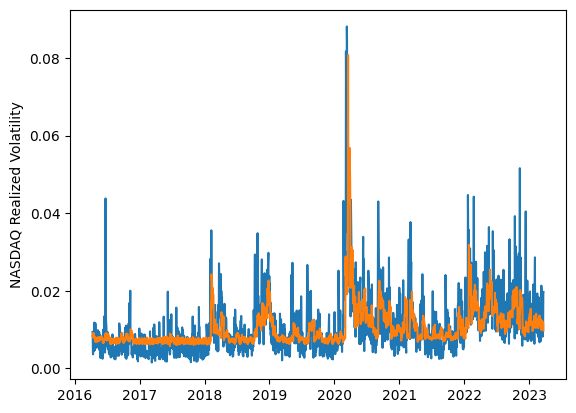

In [ ]:
# Best model
plt.plot(df_for_date["Date"][:len(test)], test)
plt.plot(df_for_date["Date"][:len(test)], true_predictions) 
plt.ylabel("NASDAQ Realized Volatility")

# H= 22 forecasts

In [ ]:
RMSE =[]
Accuracy = []
Quasilikelihood=[]

In [ ]:
for m in range (13):
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7):]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  n_features = 2
  n_input = 189
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(TCN(kernel_size=3, dilations=[1,2,4,2,1], nb_stacks=1,padding='causal',
                dropout_rate=0.2,activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
  model.add(Dense(22))
  model.compile(optimizer='adam', loss='mae', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=3)
  last_train_batch = scaled_train_input[-n_input:]
  last_train_batch = last_train_batch.reshape((1, n_input, n_features))
  a = np.array(scaled_test_input)
  test_predictions = []
  first_eval_batch = scaled_train_input[-n_input:]
  current_batch = first_eval_batch.reshape((1, n_input, n_features))
      
  for j in range(int(len(test)/22)):
              # get the prediction value for the first batch
      current_pred = model.predict(current_batch)[0]
              # append the prediction into the array
      test_predictions.append(current_pred) 
              # use the prediction to update the batch and remove the first value
      current_batch = np.append(current_batch[:,22:,:],[a[j*22:(j+1)*22]],axis=1)
  true_predictions = scaler.inverse_transform(test_predictions)
  true_predictions=true_predictions.reshape(1738,1)
  test=test[:1738]
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
  Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/3
122/122 [==============================] - 7s 13ms/step - loss: 0.1462 - accuracy: 0.0548 - mean_absolute_error: 0.1462
Epoch 2/3
122/122 [==============================] - 1s 10ms/step - loss: 0.0358 - accuracy: 0.1038 - mean_absolute_error: 0.0358
Epoch 3/3
1/1 [==============================] - 0s 27ms/step
Epoch 1/3
122/122 [==============================] - 7s 10ms/step - loss: 0.0904 - accuracy: 0.0456 - mean_absolute_error: 0.0904
Epoch 2/3
122/122 [==============================] - 1s 10ms/step - loss: 0.0321 - accuracy: 0.0331 - mean_absolute_error: 0.0321
Epoch 3/3
1/1 [==============================] - 0s 20ms/step
Epoch 1/3
122/122 [==============================] - 6s 10ms/step - loss: 0.1218 - accuracy: 0.0453 - mean_absolute_error: 0.1218
Epoch 2/3
122/122 [==============================] - 1s 9ms/step - loss: 0.0339 - accuracy: 0.0374 - mean_absolute_error: 0.0339
Epoch 3/3
1/1 [==============================] - 0s 18ms/step
Epoch 1/3
122/122 [================

In [ ]:
RMSE

[0.0047389215117621605,
 0.0046959321137832934,
 0.004924579908570501,
 0.00510290460574373,
 0.004681579797042774,
 0.004572020410309232,
 0.004744687503804595,
 0.0048930175587874455,
 0.004611882972730016,
 0.004699512620928065,
 0.004873627843324341,
 0.004761227909362187,
 0.00466814339828346,
 0.0048846956675749585,
 0.00466433698491078]

In [ ]:
Accuracy

[51.40211871032996,
 49.17000346484569,
 45.38021045105164,
 42.66743352412068,
 50.20439813537298,
 54.19530631540903,
 50.17887598178863,
 44.25369766984119,
 51.72737930031587,
 55.165757968782316,
 48.729977838165915,
 48.1503783306235,
 52.44907392674437,
 46.30094358657355,
 50.60237797537983]

In [ ]:
Quasilikelihood

[0.16545963829545446,
 0.1708927470081548,
 0.1839531129847029,
 0.19434950422861993,
 0.16549022529228563,
 0.1523996405500695,
 0.16735007748137792,
 0.18670727971958576,
 0.16096828433967533,
 0.156652877015567,
 0.17151175574856345,
 0.1734803757732938,
 0.16009037760352626,
 0.1775775298930472,
 0.16224338185462817]

Text(0, 0.5, 'NASDAQ Realized Volatility')

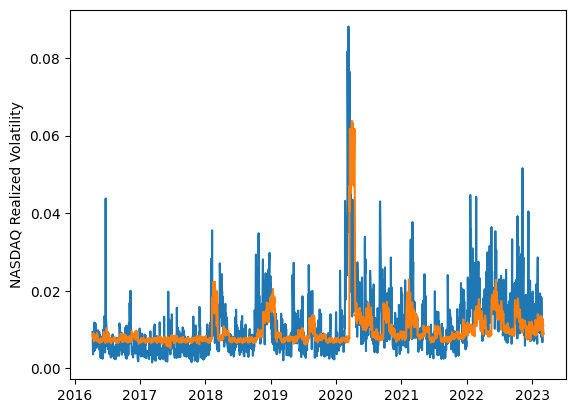

In [ ]:
# Best model
plt.plot(df_for_date["Date"][:len(test)], test)
plt.plot(df_for_date["Date"][:len(test)], true_predictions) 
plt.ylabel("NASDAQ Realized Volatility")